In [7]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
plt.ion()

import os
import sys
import re
import pdb
import glob

sys.path.append('../code')
import utils

import weblogolib
from IPython.display import Image

sns.set_style("whitegrid", {'axes.grid' : False})

In [5]:
# Load junction data
jct_files = glob.glob('../from_pipeline/counts.*_jct*.txt')
pattern = re.compile('counts\.(?P<name>.+)\.txt')
df_dict = {}
for f in jct_files:
    m = re.search(pattern,f)
    d = m.groupdict()
    name = d['name']
    df = pd.read_csv(f,sep='\t',usecols=[1,4])
    df['length'] = [len(seq) for seq in df['jct']]
    df_dict[name] = df.copy()
len(df_dict)

20

In [27]:
# Compute splicing location (0 is expected) for each locus
expected_length_dict = {
        'brca2':31,
        'smn1':28,
        'ikbkap':31
}
min_displacement = -7
max_displacement = +7
displacement_values=range(min_displacement,max_displacement+1,1)

# Compute lengths for each locus
names = df_dict.keys()
names.sort()
cols = ['<%d'%min_displacement] + displacement_values + ['>%d'%max_displacement]
displacement_df = pd.DataFrame(index=names,columns=cols)
for name in names:
    print name
    df = df_dict[name]
    gene = utils.splice(name,[0])
    displacements = df['length']-expected_length_dict[gene]
    for d in displacement_values:
        displacement_df.loc[name,d]=list(displacements).count(d)
    displacement_df.loc[name,cols[0]] = sum(displacements < min_displacement)
    displacement_df.loc[name,cols[-1]] = sum(displacements > max_displacement)

# Save file
out_file='../output/jct_displacements.txt'
displacement_df.to_csv(out_file,sep='\t')

brca2_11nt_jct_lib1
brca2_11nt_jct_lib2
brca2_11nt_jct_lib3
brca2_9nt_jct_lib1
brca2_9nt_jct_lib2
ikbkap_9nt_jct_lib1_rep1
ikbkap_9nt_jct_lib1_rep2
ikbkap_9nt_jct_lib1_rep3
ikbkap_9nt_jct_lib2_rep1
ikbkap_9nt_jct_lib2_rep2
ikbkap_9nt_jct_lib2_rep3
smn1_9nt_jct_lib1_rep1
smn1_9nt_jct_lib1_rep2
smn1_9nt_jct_lib1_rep3
smn1_9nt_jct_lib2_rep1
smn1_9nt_jct_lib2_rep2
smn1_9nt_jct_lib2_rep3
smn1_9nt_jct_lib3_rep1
smn1_9nt_jct_lib3_rep2
smn1_9nt_jct_lib3_rep3


In [28]:
!cat $out_file

	<-7	-7	-6	-5	-4	-3	-2	-1	0	1	2	3	4	5	6	7	>7
brca2_11nt_jct_lib1	65	18	44	52	103	180	538	872	4672	703	3360	3295	250	480	1588	1	0
brca2_11nt_jct_lib2	59	23	57	48	71	197	524	876	4705	720	3361	3157	2670	789	2222	4	1
brca2_11nt_jct_lib3	44	22	39	27	75	153	522	835	4569	598	178	150	144	249	694	1	0
brca2_9nt_jct_lib1	142	16	30	68	81	134	447	676	3983	398	9	11	0	2	0	0	0
brca2_9nt_jct_lib2	159	21	31	82	63	146	528	825	4439	477	176	47	2	2	0	0	0
ikbkap_9nt_jct_lib1_rep1	29	4	1	4	7	14	92	195	1585	39	49	3	3	1	1	2	4
ikbkap_9nt_jct_lib1_rep2	87	14	8	27	21	34	201	477	3355	97	108	15	17	3	5	8	20
ikbkap_9nt_jct_lib1_rep3	120	15	15	26	29	45	233	593	4005	127	124	13	18	7	12	7	26
ikbkap_9nt_jct_lib2_rep1	91	13	17	15	26	40	238	596	4137	183	128	11	21	7	4	13	62
ikbkap_9nt_jct_lib2_rep2	102	10	20	17	30	43	250	576	4094	187	134	19	21	5	5	15	14
ikbkap_9nt_jct_lib2_rep3	79	8	10	14	20	38	220	517	3846	141	116	11	9	6	4	9	19
smn1_9nt_jct_lib1_rep1	7	3	4	2	6	5	53	33	343	24	0	0	0	0	0	0	0
smn1_9nt_jct_lib1_rep2	144	17	7	33	3

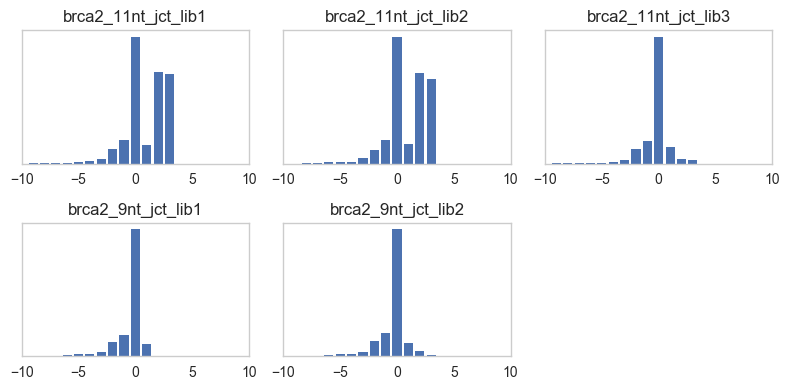

In [6]:
# Histogram junction lengths
plt.figure(figsize=[8,4])
names = [n for n in df_dict.keys() if 'brca2' in n]
names.sort()
for n, name in enumerate(names):
    plt.subplot(2,3,n+1)
    df = df_dict[name]
    lengths = df['length']
    xs = np.arange(20,35)
    ys = np.array([list(lengths).count(x) for x in xs])
    i = ys.argmax()
    plt.bar(xs-xs[i],ys)
    plt.yticks([])
    plt.title(name)
    plt.xlim([-10,10])
plt.tight_layout()
plt.savefig('../plots/jct_analysis_brca2.pdf')

In [ ]:
# Histogram junction lengths
plt.figure(figsize=[8,6])
names = [n for n in df_dict.keys() if 'smn1' in n]
names.sort()
for n, name in enumerate(names):
    plt.subplot(3,3,n+1)
    df = df_dict[name]
    lengths = df['length']
    xs = np.arange(20,35)
    ys = np.array([list(lengths).count(x) for x in xs])
    i = ys.argmax()
    plt.bar(xs-xs[i],ys)
    plt.yticks([])
    plt.title(name)
    plt.xlim([-10,10])
plt.tight_layout()
plt.savefig('plots/jct_analysis_smn1.pdf')

In [ ]:
# Histogram junction lengths
plt.figure(figsize=[8,4])
names = [n for n in df_dict.keys() if 'ikbkap' in n]
names.sort()
for n, name in enumerate(names):
    plt.subplot(2,3,n+1)
    df = df_dict[name]
    lengths = df['length']
    xs = np.arange(20,35)
    ys = np.array([list(lengths).count(x) for x in xs])
    i = ys.argmax()
    plt.bar(xs-xs[i],ys)
    plt.yticks([])
    plt.title(name)
    plt.xlim([-10,10])
plt.tight_layout()
plt.savefig('plots/jct_analysis_ikbkap.pdf')